## **Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial**

***
Datos del alumno (Nombre y Apellidos): Elvis Torres Torres

Fecha: 29/04/2024
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Tema: Predicción de pérdida de clientes en el sector bancario</span>

**Objetivo**

Desarrollar un modelo predictivo de churn bancario utilizando técnicas avanzadas de aprendizaje automático, con el fin de identificar a los clientes con mayor riesgo de abandonar la institución.


<span style="font-size: 16pt; font-weight: bold; color: #0098cd;">Fase1. Preparación de los datos</span>

#### Origen de datos

In [1]:
#Importaciones necesarias
import pandas as pd
import numpy as np

In [2]:
# Lectura de dataset
df_inicial = pd.read_csv('Datos/Churn_Modelling.csv', sep=',', decimal='.')
print("Numero de instancias : ",df_inicial.shape[0])

Numero de instancias :  10002


#### Limpieza de datos

In [3]:
#Distribución de tipo de variables
num_discretas = df_inicial.select_dtypes(include=['int64']).shape[1]
num_categoricas = df_inicial.select_dtypes(include=['object', 'category', 'datetime64[ns]', 'bool']).shape[1]
print(num_discretas, " variables discretas y ", num_categoricas, " categorías")

6  variables discretas y  3  categorías


In [4]:
# Identificar filas duplicadas
duplicados = df_inicial.duplicated()

# Mostrar las filas duplicadas
filas_duplicadas = df_inicial[duplicados]

# Contar el número de duplicados
num_duplicados = duplicados.sum()

print(f"Número de filas duplicadas: {num_duplicados}")


Número de filas duplicadas: 2


In [5]:
# Eliminar filas duplicadas
df = df_inicial.drop_duplicates()

#Eliminación de la columna del número de fila
df = df.drop(columns=['RowNumber'])
df = df.drop(columns=['Surname'])
df = df.drop(columns=['CustomerId'])

In [6]:
print("Numero de instancias sin duplicados : ",df.shape[0])
print(df.dtypes)
# Identificar las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", columnas_numericas)

Numero de instancias sin duplicados :  10000
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object
Columnas numéricas: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [7]:
#Valores nulos
print(df.isnull().sum())

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:

from sklearn.impute import SimpleImputer
df_imputar = df.copy()

# Imputación con la media para la columna Age (Numérica)
imputer_media = SimpleImputer(strategy='mean')
df_imputar.loc[:, 'Age'] = imputer_media.fit_transform(df_imputar[['Age']])

# Imputación con la moda para las columnas categóricas
imputer_moda = SimpleImputer(strategy='most_frequent')
df_imputar.loc[:, 'Geography'] = imputer_moda.fit_transform(df_imputar[['Geography']])
df_imputar.loc[:, 'HasCrCard'] = imputer_moda.fit_transform(df_imputar[['HasCrCard']])
df_imputar.loc[:, 'IsActiveMember'] = imputer_moda.fit_transform(df_imputar[['IsActiveMember']])

# Mostrar el conteo de valores faltantes después de la imputación
print("Valores faltantes después de la imputación:")
print(df_imputar.isnull().sum())

df=df_imputar.copy()

Valores faltantes después de la imputación:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para detectar outliers
def detectar_outliers(df, columnas):
    outliers_list = []
    for column in columnas:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
        outliers_list.append({
            'Column': column,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers': outliers_count
        })
    return pd.DataFrame(outliers_list)

# Identificar las columnas numéricas
columnas_numericas = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Detección de outliers
outliers_detectados = detectar_outliers(df, columnas_numericas)
print(outliers_detectados)

# Ordenar las columnas por el número de outliers y seleccionar las 3 con más outliers
top_3_outliers = outliers_detectados.sort_values(by='Outliers', ascending=False).head(3)
columnas_top_3 = top_3_outliers['Column'].tolist()
print("Las 3 columnas con más outliers son:", columnas_top_3)

            Column   Lower Bound   Upper Bound  Outliers
0      CreditScore     383.00000     919.00000        15
1              Age      14.00000      62.00000       359
2          Balance -191466.36000  319110.60000         0
3    NumOfProducts      -0.50000       3.50000        60
4  EstimatedSalary  -96577.09625  296967.45375         0
Las 3 columnas con más outliers son: ['Age', 'NumOfProducts', 'CreditScore']


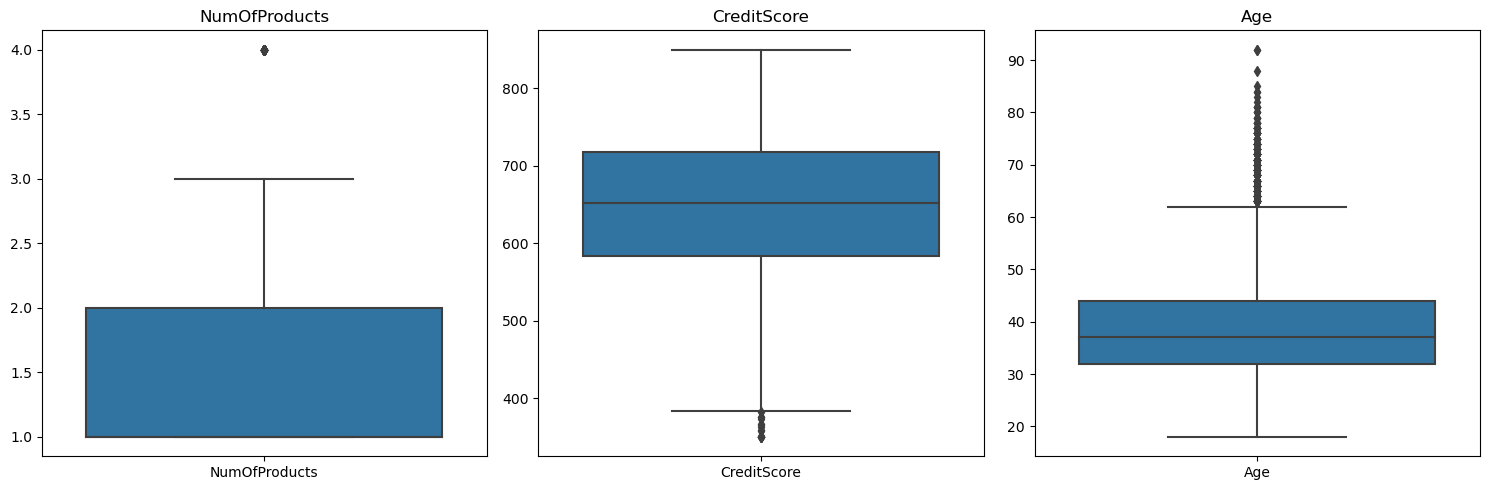

In [10]:
#Visualizo diagrama las columnas que identifico como outliers

# Identificar las columnas numéricas
columnas_numericas = ['NumOfProducts', 'CreditScore', 'Age']

# Crear una figura grande para contener los subplots
fig, axes = plt.subplots(1, len(columnas_numericas), figsize=(15, 5))

# Visualización de los outliers usando boxplots
for ax, column in zip(axes, columnas_numericas):
    sns.boxplot(data=df[[column]], ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [11]:
# Función para eliminar outliers
def eliminar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers de las 3 columnas con más outliers
for column in columnas_top_3:
    df = eliminar_outliers(df, column)


In [12]:
# Datos despues de eliminación
print("Numero de instancias sin outliers : ",df.shape[0])

Numero de instancias sin outliers :  9569


<span style="font-size: 16pt; font-weight: bold; color: #0098cd;">Fase2. Preprocesamiento de datos</span>

#### Elección de características

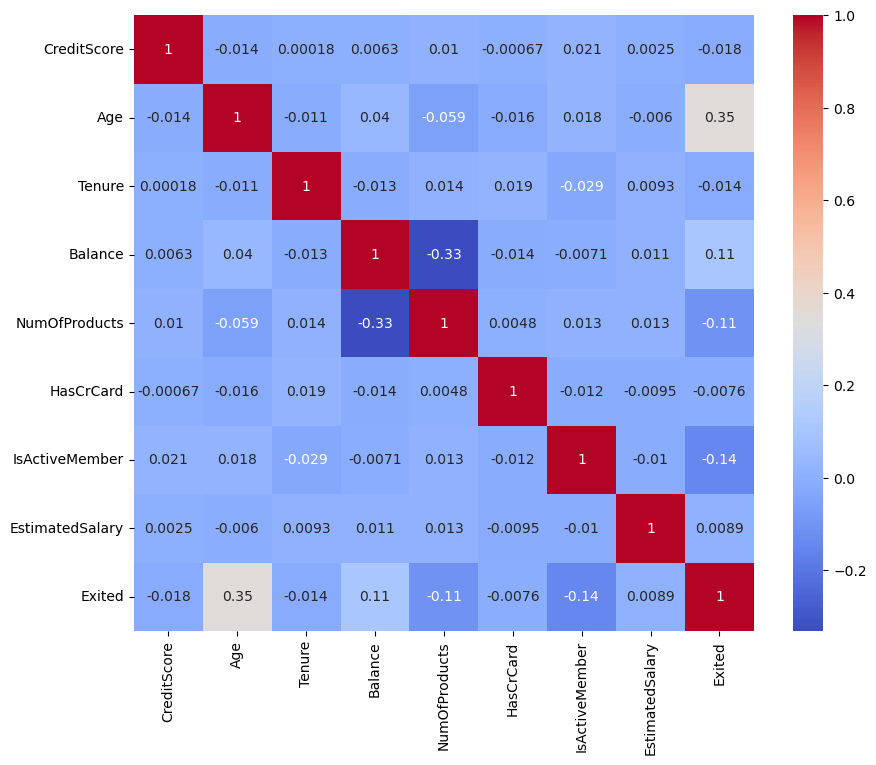

In [13]:
# Seleccionar columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Análisis de Correlación
correlacion = df_numeric.corr(numeric_only=True)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()


In [14]:
#Reducir la dimencionalidad

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar características numéricas y estandarizarlas
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
x = df[features]
y = df['Exited']

# Estandarizar las características
x = StandardScaler().fit_transform(x)

In [15]:
# Mostrar las correlaciones con la variable objetivo 'Exited' para confirmar que no se requiere reducir la dimencionalidad
correlacion_objetivo = correlacion['Exited'].sort_values(ascending=False)
print(correlacion_objetivo)

Exited             1.000000
Age                0.353590
Balance            0.114761
EstimatedSalary    0.008878
HasCrCard         -0.007612
Tenure            -0.014453
CreditScore       -0.018228
NumOfProducts     -0.109375
IsActiveMember    -0.144852
Name: Exited, dtype: float64


#### Transformación de Variables

In [16]:
#Codificación de Variables Categóricas

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identificar las columnas categóricas
columnas_categoricas = ['Geography', 'Gender']
print ("Columnas categoricas:", columnas_categoricas)

Columnas categoricas: ['Geography', 'Gender']


In [17]:
# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

In [18]:
#Normalización y Escalado

# Seleccionar las columnas numéricas (después de la codificación)
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_numericas.remove('Exited')  # Excluir la columna objetivo
# Aplicar StandardScaler para normalizar las características numéricas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

print(df.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.329398  0.485463 -1.043911 -1.224491      -0.938522   0.646568   
1    -0.443835  0.371586 -1.390169  0.118270      -0.938522  -1.546628   
2    -1.546592  0.485463  1.033635  1.333579       2.699604   0.646568   
3     0.502871  0.143832 -1.390169 -1.224491       0.880541  -1.546628   
4     2.073780  0.599340 -1.043911  0.786431      -0.938522   0.646568   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0        0.992608         0.021668       1          -0.578275   
1        0.992608         0.216264       0          -0.578275   
2       -1.007448         0.240411       1          -0.578275   
3       -1.007448        -0.109102       0          -0.578275   
4        0.992608        -0.365393       0          -0.578275   

   Geography_Spain  Gender_Male  
0        -0.574253    -1.099505  
1         1.741393    -1.099505  
2        -0.574253    -1.099505  
3        -0.574253    -1.099

<span style="font-size: 16pt; font-weight: bold; color: #0098cd;">Fase 3. Análisis de los datos.</span>

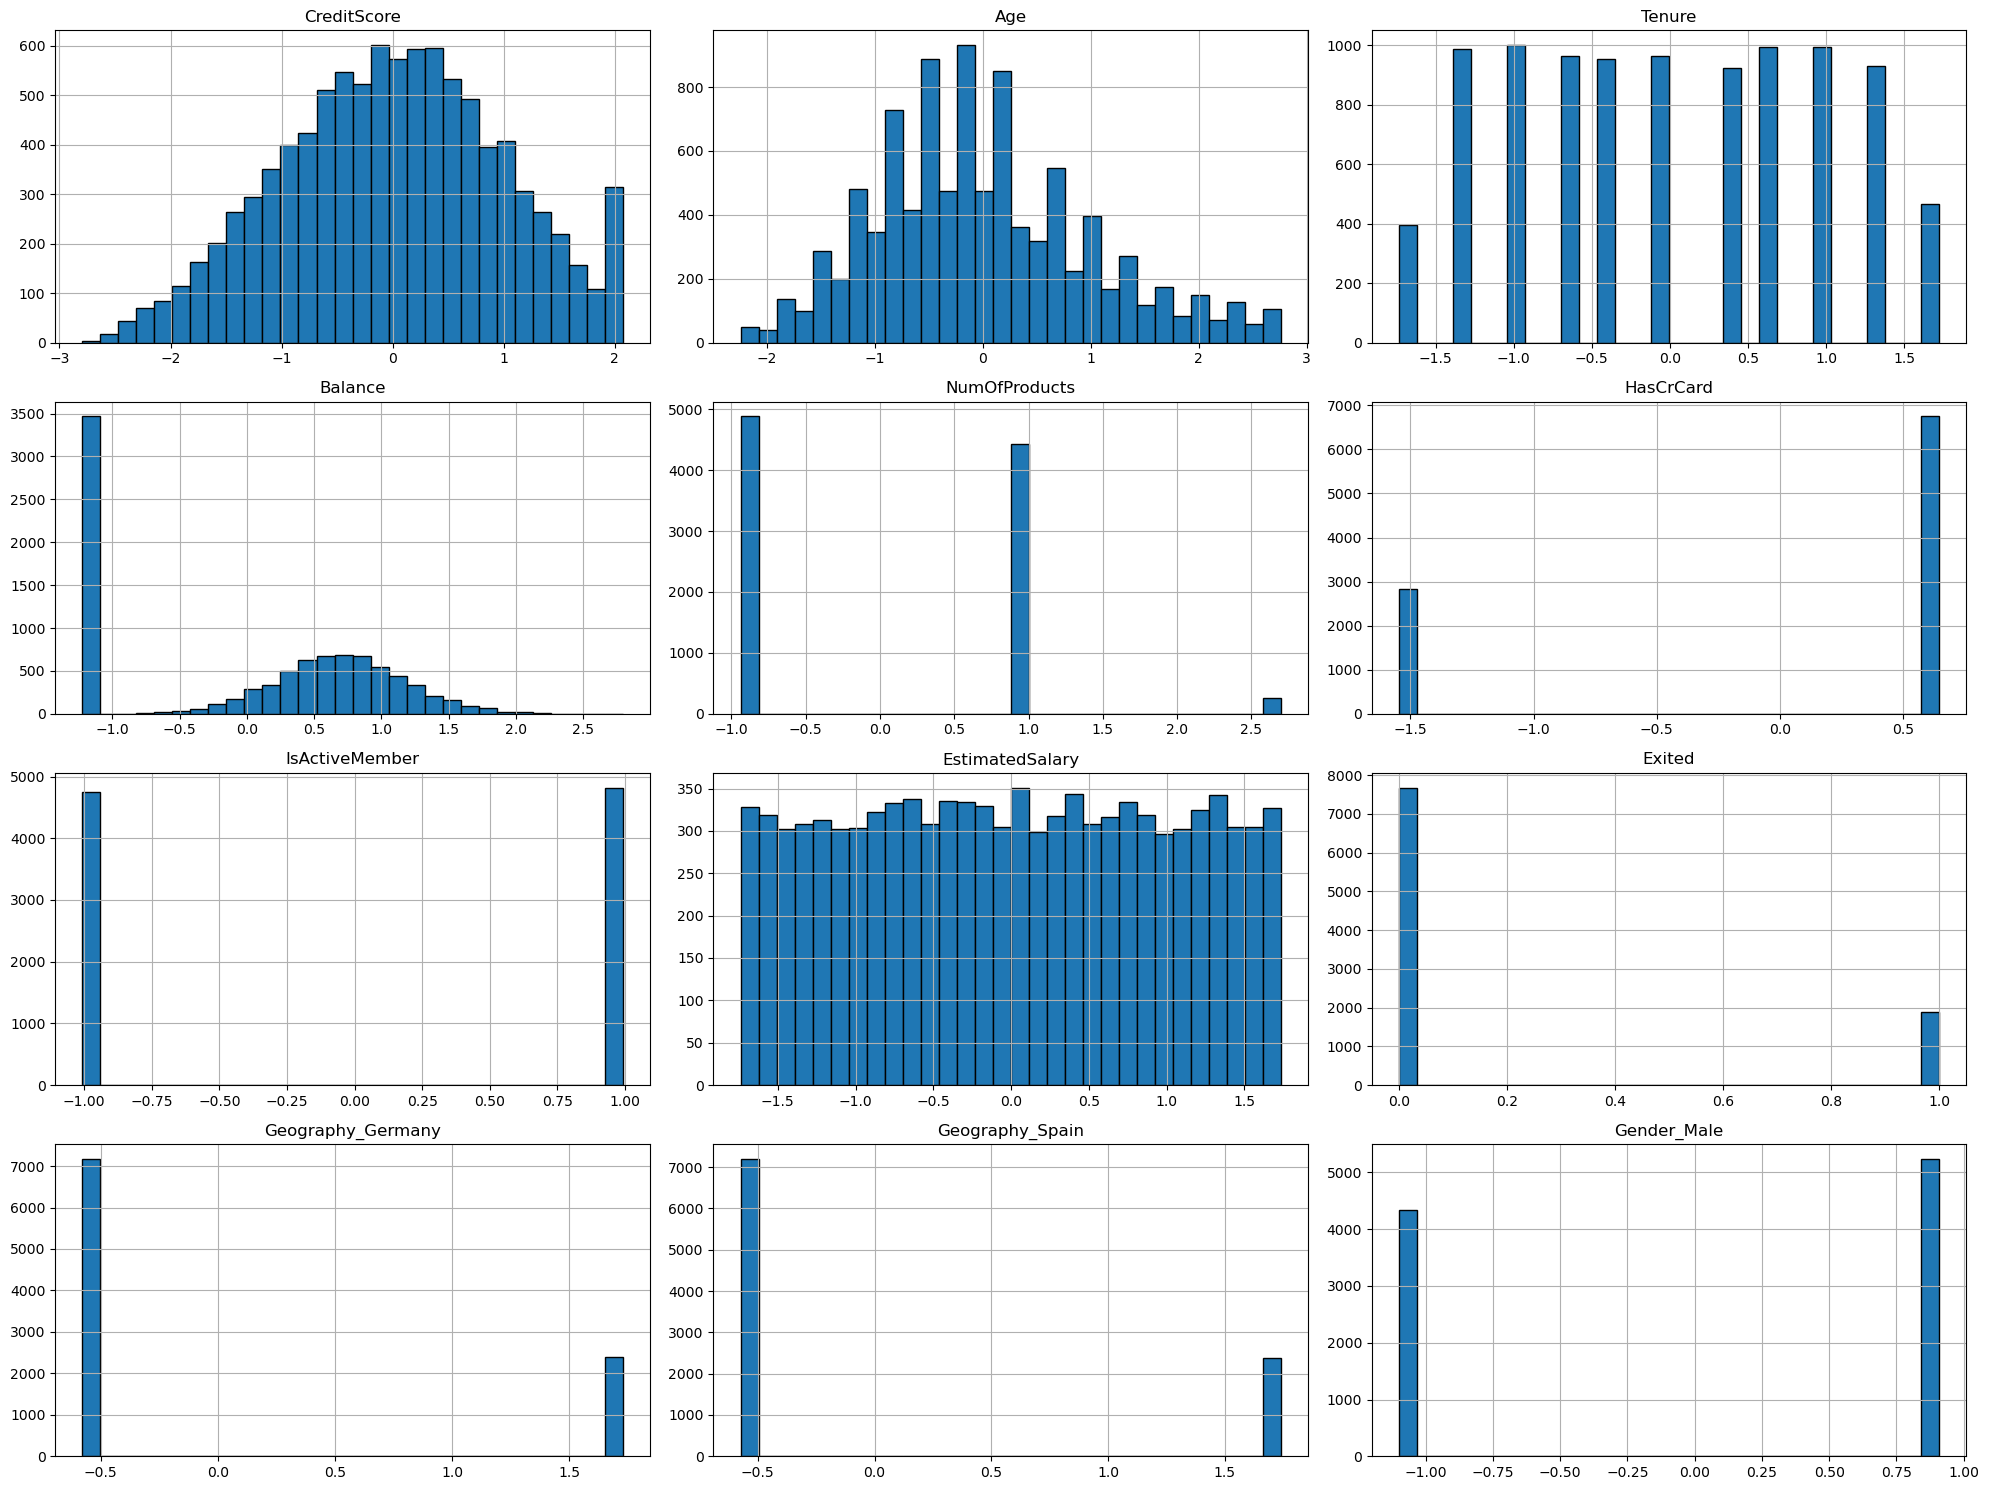

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para todas las variables numéricas
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

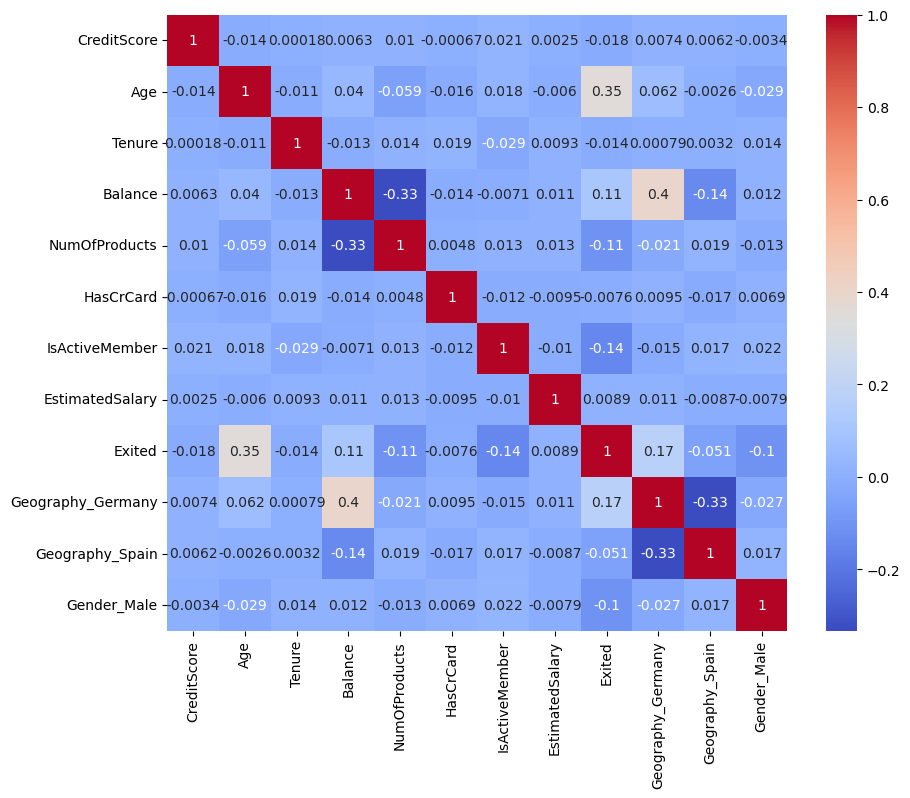

In [20]:
# Visualizo nuevamnete la matriz de correlación con nuevas columnas numéricas
# Seleccionar columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Análisis de Correlación
correlacion = df_numeric.corr(numeric_only=True)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

In [21]:
# Estadísticas descriptivas
estadisticas_descriptivas = df.describe().T
print(estadisticas_descriptivas)

                    count          mean       std       min       25%  \
CreditScore        9569.0  5.130996e-16  1.000052 -2.794997 -0.693516   
Age                9569.0 -2.283330e-16  1.000052 -2.247587 -0.653308   
Tenure             9569.0 -1.232627e-16  1.000052 -1.736427 -0.697654   
Balance            9569.0  0.000000e+00  1.000052 -1.224491 -1.224491   
NumOfProducts      9569.0  5.457717e-17  1.000052 -0.938522 -0.938522   
HasCrCard          9569.0 -6.088881e-17  1.000052 -1.546628 -1.546628   
IsActiveMember     9569.0 -3.341459e-17  1.000052 -1.007448 -1.007448   
EstimatedSalary    9569.0 -1.410838e-16  1.000052 -1.740025 -0.853341   
Exited             9569.0  1.977218e-01  0.398302  0.000000  0.000000   
Geography_Germany  9569.0  3.638478e-17  1.000052 -0.578275 -0.578275   
Geography_Spain    9569.0 -2.673167e-17  1.000052 -0.574253 -0.574253   
Gender_Male        9569.0  1.277180e-16  1.000052 -1.099505 -1.099505   

                        50%       75%       max  


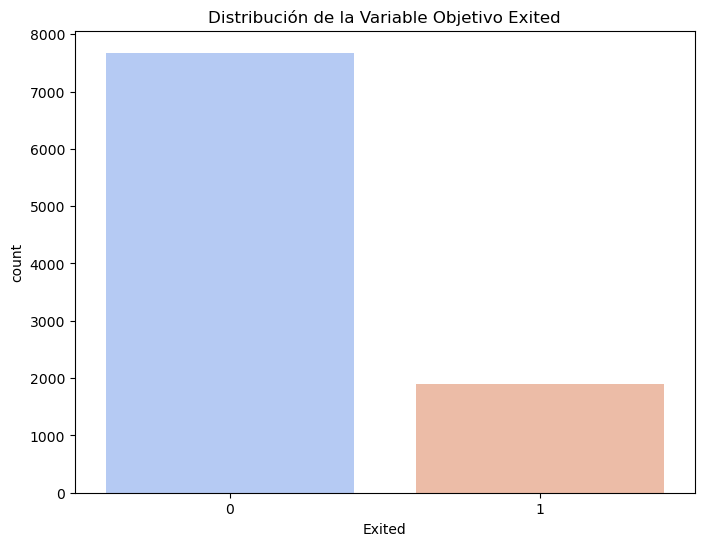

In [22]:
# Distribución de la variable objetivo 'Exited'
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df, palette='coolwarm')
plt.title('Distribución de la Variable Objetivo Exited')
plt.show()

<span style="font-size: 16pt; font-weight: bold; color: #0098cd;">Fase 4. Desarrollo del modelo</span>

#### División del Conjunto de Datos

In [23]:
from sklearn.model_selection import train_test_split

# Separar características y la variable objetivo
X = df.drop(columns=['Exited'])
y = df['Exited']

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (6698, 11)
Tamaño del conjunto de validación: (1435, 11)
Tamaño del conjunto de prueba: (1436, 11)


#### Regresión logistica

In [24]:
#Entrenamiento de Modelos y Ajuste de Hiperparámetros
#Regresión logistica:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Ejemplo con Regresión Logística
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor precisión: {grid_search.best_score_}")

Mejores hiperparámetros: {'C': 1, 'solver': 'saga'}
Mejor precisión: 0.8324867076120517


In [26]:
# Evaluación de Modelos
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Predecir en el conjunto de validación
y_pred_val = grid_search.predict(X_val)
y_pred_proba_val = grid_search.predict_proba(X_val)[:, 1]

# Calcular métricas
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
auc = roc_auc_score(y_val, y_pred_proba_val)

print(f"Precisión: {accuracy}")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc}")

Precisión: 0.8334494773519163
Precisión: 0.6306306306306306
Recall: 0.26119402985074625
F1-score: 0.36939313984168864
AUC-ROC: 0.7945810791799357


##### El modelo de regresión logística ha alcanzado una precisión de aproximadamente 83.3% en el conjunto de validación. Sin embargo, otras métricas como la precisión (precision), el recall y el F1-score indican que el modelo puede estar desequilibrado o que no está capturando bien la clase minoritaria (en este caso, los clientes que abandonan).

#### Random Forest:

In [27]:
# ejecuto en linea de comandos para evitar el conflicto de librerias
# pip install --upgrade scikit-learn imbalanced-learn
# pip uninstall scikit-learn imbalanced-learn
# pip install scikit-learn imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir el modelo y la búsqueda de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Evaluar en el conjunto de validación
y_pred_val_rf = grid_search_rf.predict(X_val)
y_pred_proba_val_rf = grid_search_rf.predict_proba(X_val)[:, 1]

# Calcular métricas
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
precision_rf = precision_score(y_val, y_pred_val_rf)
recall_rf = recall_score(y_val, y_pred_val_rf)
f1_rf = f1_score(y_val, y_pred_val_rf)
auc_rf = roc_auc_score(y_val, y_pred_proba_val_rf)

print(f"Mejores hiperparámetros: {grid_search_rf.best_params_}")
print(f"Precisión: {accuracy_rf}")
print(f"Precisión: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")
print(f"AUC-ROC: {auc_rf}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisión: 0.8348432055749129
Precisión: 0.5551601423487544
Recall: 0.582089552238806
F1-score: 0.5683060109289616
AUC-ROC: 0.8451508524216961


In [ ]:
Balanceo de clases con SMOTE: Aplica SMOTE para balancear las clases en el conjunto de entrenamiento.
Entrenamiento y evaluación del modelo: Define un modelo de Random Forest, realiza la búsqueda de hiperparámetros y evalúa el modelo en el conjunto de validación.

#### Maquinas de soporte vectorial:

In [33]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir el modelo y la búsqueda de hiperparámetros para SVM
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_resampled, y_train_resampled)

# Evaluar en el conjunto de validación
y_pred_val_svc = grid_search_svc.predict(X_val)
y_pred_proba_val_svc = grid_search_svc.predict_proba(X_val)[:, 1]

# Calcular métricas
accuracy_svc = accuracy_score(y_val, y_pred_val_svc)
precision_svc = precision_score(y_val, y_pred_val_svc)
recall_svc = recall_score(y_val, y_pred_val_svc)
f1_svc = f1_score(y_val, y_pred_val_svc)
auc_svc = roc_auc_score(y_val, y_pred_proba_val_svc)

print(f"Mejores hiperparámetros: {grid_search_svc.best_params_}")
print(f"Precisión: {accuracy_svc}")
print(f"Precisión: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1-score: {f1_svc}")
print(f"AUC-ROC: {auc_svc}")

Mejores hiperparámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Precisión: 0.7770034843205574
Precisión: 0.375
Recall: 0.291044776119403
F1-score: 0.32773109243697474
AUC-ROC: 0.7247023238562968


#### Redes Neuronales

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier


# Separar características y la variable objetivo
X = df.drop(columns=['Exited'])
y = df['Exited']

# Dividir el conjunto de datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Identificar columnas categóricas y numéricas
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numeric_features = X_train.select_dtypes(include=[np.number]).columns

# Crear transformadores para las columnas categóricas y numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Aplicar los transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicar el preprocesamiento al conjunto de datos
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Definir la función para crear el modelo
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, neurons=32):
    model = Sequential()
    model.add(Input(shape=(X_train_resampled.shape[1],)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Crear el modelo de KerasClassifier usando scikeras
model = KerasClassifier(
    model=create_model,
    verbose=0,
    optimizer="adam",
    activation="relu",
    dropout_rate=0.0,
    neurons=32
)

# Definir la búsqueda de hiperparámetros
param_grid = {
    'batch_size': [10, 20],
    'epochs': [20, 50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.2],
    'neurons': [32, 64]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# Evaluar en el conjunto de validación
best_model = grid_result.best_estimator_.model_
y_pred_val_nn = (best_model.predict(X_val_processed) > 0.5).astype("int32")
y_pred_proba_val_nn = best_model.predict(X_val_processed)

# Calcular métricas
accuracy_nn = accuracy_score(y_val, y_pred_val_nn)
precision_nn = precision_score(y_val, y_pred_val_nn)
recall_nn = recall_score(y_val, y_pred_val_nn)
f1_nn = f1_score(y_val, y_pred_val_nn)
auc_nn = roc_auc_score(y_val, y_pred_proba_val_nn)

print(f"Mejores hiperparámetros: {grid_result.best_params_}")
print(f"Precisión: {accuracy_nn}")
print(f"Precisión: {precision_nn}")
print(f"Recall: {recall_nn}")
print(f"F1-score: {f1_nn}")
print(f"AUC-ROC: {auc_nn}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mejores hiperparámetros: {'activation': 'tanh', 'batch_size': 20, 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 64, 'optimizer': 'adam'}
Precisión: 0.8034843205574913
Precisión: 0.478125
Recall: 0.5708955223880597
F1-score: 0.5204081632653061
AUC-ROC: 0.7999910473340239


In [25]:
#Redes neuronales profundas2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Separar características y la variable objetivo
X = df.drop(columns=['Exited'])
y = df['Exited']

# Dividir el conjunto de datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Identificar columnas categóricas y numéricas
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numeric_features = X_train.select_dtypes(include=[np.number]).columns

# Crear transformadores para las columnas categóricas y numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Aplicar los transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicar el preprocesamiento al conjunto de datos
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Definir la red neuronal profunda de 128 a 256
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la red neuronal profunda
history = model.fit(X_train_processed, y_train, validation_data=(X_val_processed, y_val), epochs=50, batch_size=32)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f'Loss en el conjunto de prueba 0.3520: {test_loss}')
print(f'Precisión en el conjunto de prueba 0.8461: {test_accuracy}')

Epoch 1/50


C:\Users\elvis\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8019 - loss: 0.4887 - val_accuracy: 0.8300 - val_loss: 0.3901
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4145 - val_accuracy: 0.8404 - val_loss: 0.3676
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4110 - val_accuracy: 0.8495 - val_loss: 0.3516
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.3830 - val_accuracy: 0.8578 - val_loss: 0.3464
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3808 - val_accuracy: 0.8599 - val_loss: 0.3359
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.3914 - val_accuracy: 0.8627 - val_loss: 0.3380
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.3556 - val_accuracy: 0.8578 - val_loss: 0.3577
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.3611 - val_accuracy: 0.8613 - val_

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import recall_score, f1_score, roc_auc_score

# Ajustar la tasa de aprendizaje
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Definir la red neuronal profunda
model = Sequential()
model.add(Dense(128, input_shape=(X_train_processed.shape[1],)))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con una tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la red neuronal profunda con el programador de tasa de aprendizaje
history = model.fit(X_train_processed, y_train, validation_data=(X_val_processed, y_val), epochs=100, batch_size=32, callbacks=[lr_scheduler, early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f'Loss en el conjunto de prueba 0.3497: {test_loss}')
print(f'Precisión en el conjunto de prueba 0.8551: {test_accuracy}')

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test_processed).ravel()

# Convertir probabilidades a etiquetas
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calcular Recall, F1-score y AUC-ROC
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f'Recall en el conjunto de prueba: {recall}')
print(f'F1-score en el conjunto de prueba: {f1}')
print(f'AUC-ROC en el conjunto de prueba: {auc_roc}')

Epoch 1/100


C:\Users\elvis\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8022 - loss: 0.4697 - val_accuracy: 0.8369 - val_loss: 0.3867 - learning_rate: 0.0100
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.4261 - val_accuracy: 0.8544 - val_loss: 0.3647 - learning_rate: 0.0100
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.3845 - val_accuracy: 0.8585 - val_loss: 0.3445 - learning_rate: 0.0100
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8412 - loss: 0.3851 - val_accuracy: 0.8425 - val_loss: 0.3766 - learning_rate: 0.0100
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8339 - loss: 0.3934 - val_accuracy: 0.8551 - val_loss: 0.3424 - learning_rate: 0.0100
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.3876 - val_accuracy: 0.8544 - val_loss: 0.3443 - learning_rate: 0.0100
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3837 - val_a

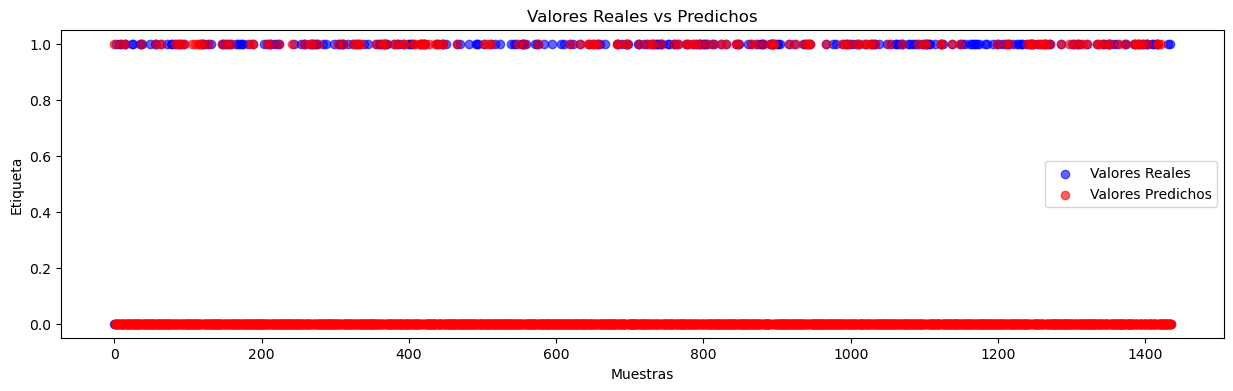

In [61]:
# Generar el gráfico de valores reales vs predichos
plt.figure(figsize=(15, 4))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Valores Reales')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.6, label='Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Muestras')
plt.ylabel('Etiqueta')
plt.legend()
plt.show()

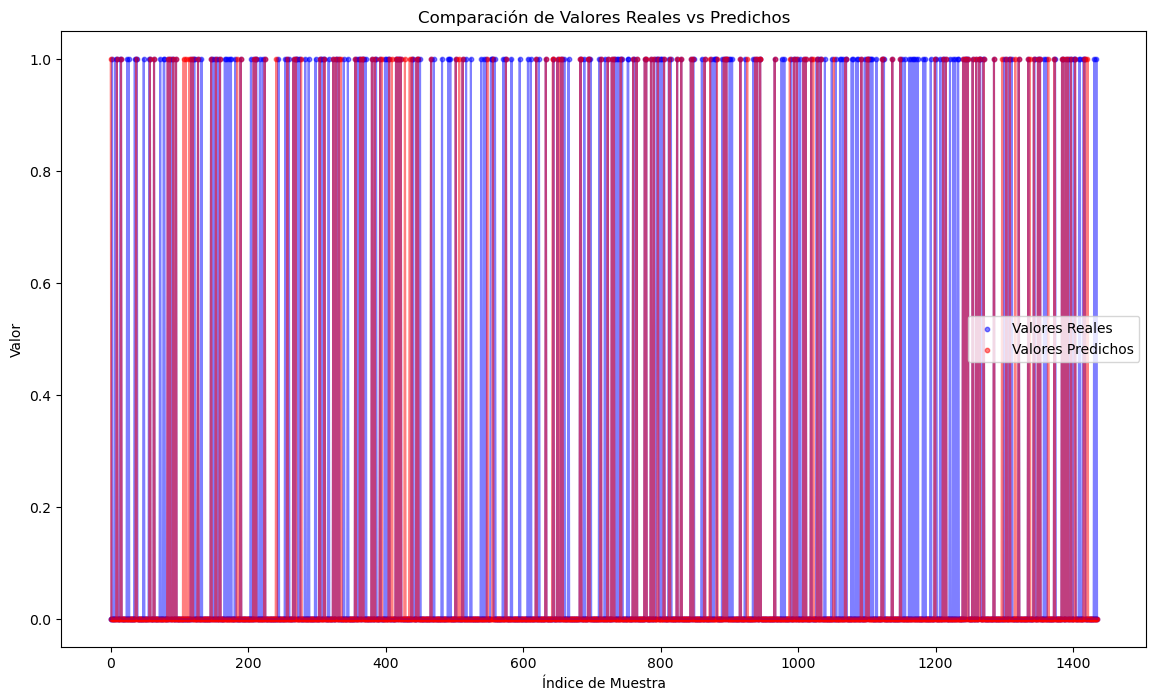

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Generar el gráfico de dispersión
def plot_comparison_scatter(y_true, y_pred):
    plt.figure(figsize=(14, 8))
    plt.scatter(range(len(y_true)), y_true, color='blue', alpha=0.5, label='Valores Reales', s=10)
    plt.scatter(range(len(y_true)), y_pred, color='red', alpha=0.5, label='Valores Predichos', s=10)
    plt.plot(range(len(y_true)), y_true, color='blue', alpha=0.5)
    plt.plot(range(len(y_true)), y_pred, color='red', alpha=0.5)
    plt.title('Comparación de Valores Reales vs Predichos')
    plt.xlabel('Índice de Muestra')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

# Llamar a la función de trazado con los valores reales y predichos
plot_comparison_scatter(y_test, y_pred)